In [2]:
import random
import matplotlib.pyplot as plt


In [9]:
# Simulation parameters
ARRIVAL = 5.0  # Avg time between arrivals (lambda = 1/5)
SIM_TIME = 100000 # how long the simulation will run
SERVICE_TIMES = [1.0, 1.2, 1.5, 1.8, 2.0, 2.3, 2.5, 2.8, 3.0, 3.5,
                 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 8.0, 9.0, 10.0] # Test different avg service times


In [10]:
# initialixe vars
def simulate_mm1(service_time_mean):
    current_time = 0.0 #track simulated time
    queue = [] #store packets waiting
    busy = False #is the server busy?
    next_arrival = random.expovariate(1.0 / ARRIVAL) #when the next packet arrives
    next_departure = float('inf') # when the current packet finishes service
    

    # Metrics => measurement variables
    # here we compute :
    # - how many packets come and left
    # - how long they waited in the queue
    # - how long the server was busy
    # - Avg number of packets in the system
    num_arrivals = 0
    num_departures = 0
    total_delay = 0.0
    total_queue_time = 0.0
    busy_time = 0.0
    last_event_time = 0.0
    area_under_qt = 0.0  # For avg number of packets
    
    # we keep simulating event unitll the simulated time ends
    while current_time < SIM_TIME:
        # compare the next arrival vs next depature 
        # whichever is earlier happens next
        if next_arrival < next_departure:
            # here a new packet arrives
            # it is added to the queue
            # and we schedule the next arrival
            current_time = next_arrival
            area_under_qt += len(queue) * (current_time - last_event_time)
            last_event_time = current_time

            num_arrivals += 1
            queue.append(current_time)
            next_arrival = current_time + random.expovariate(1.0 / ARRIVAL)

            # if server is idle
            # starts working on this packet immediately
            # then a service time is randomly chosen
            # and we schedule the next departure
            if not busy:
                busy = True
                arrival_time = queue.pop(0)
                delay = 0.0
                service_duration = random.expovariate(1.0 / service_time_mean)
                next_departure = current_time + service_duration
                busy_time += service_duration
        else:
            # here a packet leaves the system
            current_time = next_departure
            area_under_qt += len(queue) * (current_time - last_event_time)
            last_event_time = current_time

            num_departures += 1
            # if queue has more packets
            # next packet starts being served
            # we track how long waited 
            # and schedule its departure
            if queue:
                arrival_time = queue.pop(0)
                delay = current_time - arrival_time
                total_delay += delay
                service_duration = random.expovariate(1.0 / service_time_mean)
                next_departure = current_time + service_duration
                busy_time += service_duration
            # but if the queue is empty
            # we have no packet and server becomes idle
            else:
                busy = False
                next_departure = float('inf')

    avg_num_packets = area_under_qt / current_time
    avg_delay = total_delay / num_departures if num_departures > 0 else 0
    utilization = busy_time / current_time

    return avg_num_packets, avg_delay, utilization


In [11]:
# After the end of simulation
# we calculate the average number of packets in the system
# and the average delay per packet
# and the server utilization(waht frction of time the server was busy)
avg_packets_list = []
avg_delay_list = []
utilization_list = []

In [12]:
# Run the simulation for different service times
# fast, normal and slow service
# the collect and compare the results
for service in SERVICE_TIMES:
    packets, delay, util = simulate_mm1(service)
    avg_packets_list.append(packets)
    avg_delay_list.append(delay)
    utilization_list.append(util)

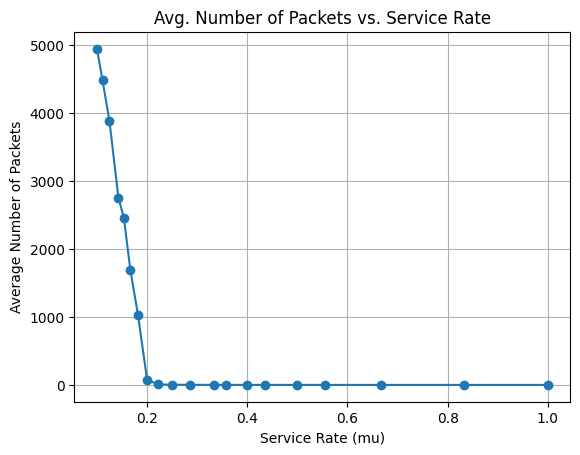

In [13]:
# Plotting the results
plt.figure()
plt.plot([1/s for s in SERVICE_TIMES], avg_packets_list, marker='o')
plt.xlabel('Service Rate (mu)')
plt.ylabel('Average Number of Packets')
plt.title('Avg. Number of Packets vs. Service Rate')
plt.grid(True)
plt.show()

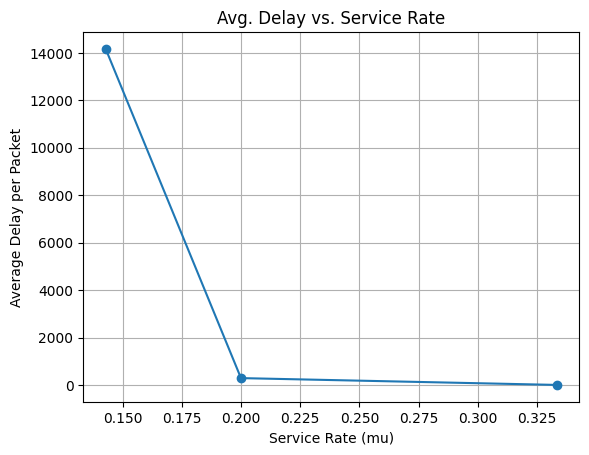

In [15]:
plt.figure()
plt.plot([1/s for s in SERVICE_TIMES], avg_delay_list, marker='o')
plt.xlabel('Service Rate (mu)')
plt.ylabel('Average Delay per Packet')
plt.title('Avg. Delay vs. Service Rate')
plt.grid(True)
plt.show()


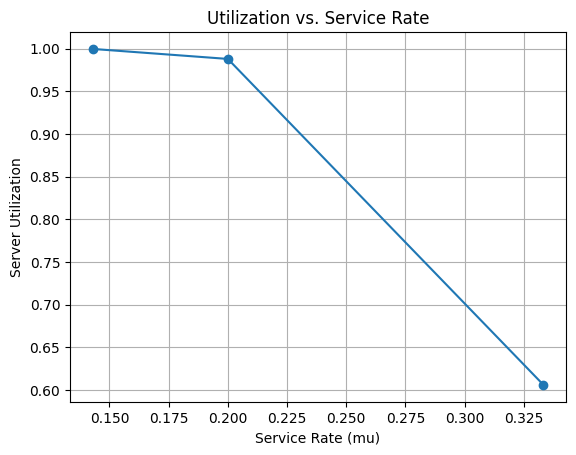

In [16]:
plt.figure()
plt.plot([1/s for s in SERVICE_TIMES], utilization_list, marker='o')
plt.xlabel('Service Rate (mu)')
plt.ylabel('Server Utilization')
plt.title('Utilization vs. Service Rate')
plt.grid(True)
plt.show()
